In [53]:
import pandas as pd
import os
import numpy as np
import scipy as sp
import torch
import pystan

In [69]:
from scipy.stats import uniform, norm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [70]:
model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real A;
    real b;
    real e;
    real<lower=0> sigma;
}
model {
    y ~ normal(A * x + b + e, sigma);
}
"""

In [79]:
np.random.seed(0)
A = 1.2
b = -0.3
sigma = 0.2
N = 100

In [80]:
X = torch.from_numpy(uniform.rvs(size=N))
X.detach()
X = X.float()

In [81]:
e = torch.from_numpy(norm.rvs(loc=0, scale=sigma, size=N)).float()

In [82]:
np.random.seed(0)
A = 1.2
b = -0.3
sigma = 0.2
N = 100
X = torch.from_numpy(uniform.rvs(size=N))
X.detach()
X = X.float()
e = torch.from_numpy(norm.rvs(loc=0, scale=sigma, size=N)).float()
y = A*X + b + e
y.detach()
y = y.float()

In [83]:
y.detach()
y = y.float()

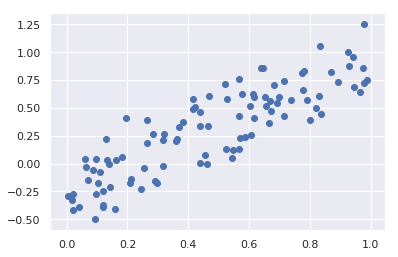

In [84]:
plt.scatter(X,y)

In [63]:
# Put our data in a dictionary
data = {'N': len(x), 'x': X, 'y': y}

# Compile the model
sm = pystan.StanModel(model_code=model)

# Train the model and generate samples
fit = sm.sampling(data=data, iter=20, chains=4, warmup=10, thin=1, seed=101)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b5a3dd1dfecd1f505e0c42b19365f691 NOW.


Inference for Stan model: anon_model_b5a3dd1dfecd1f505e0c42b19365f691.
4 chains, each with iter=20; warmup=10; thin=1; 
post-warmup draws per chain=10, total post-warmup draws=40.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
A       1.14    0.24   0.51  -0.65   1.01    1.2    1.4   1.84      4   2.01
b      -2.61     3.1    4.5 -10.34  -5.72  -0.06 5.7e-3   0.12      2 104.92
e       2.38    3.09   4.49  -0.37  -0.31  -0.19    5.8  10.08      2   42.5
sigma   0.26    0.03   0.09   0.19    0.2   0.23   0.29   0.61      9   1.49
lp__   95.55    7.61  23.01   6.39   87.3 105.05 108.89 109.65      9   1.55

Samples were drawn using NUTS at Wed Jul 17 13:19:23 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [64]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

A_mean, b_mean, e_mean = df['mean']['A'], df['mean']['b'], df['mean']['e']


# Extracting traces
A = fit['A']
b = fit['b']
e = fit['e']
sigma = fit['sigma']
lp = fit['lp__']

(0, 1)

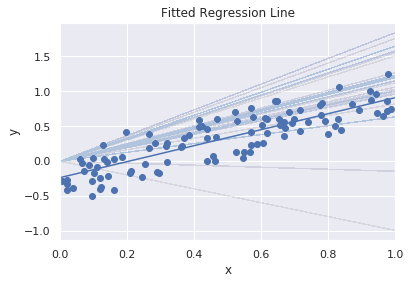

In [68]:
x_min, x_max = 0, 1
x_plot = np.linspace(x_min, x_max, 100)

# Plot a subset of sampled regression lines
for _ in range(1000):
  A_p, b_p, e_p = np.random.choice(A), np.random.choice(b), np.random.choice(e)
  plt.plot(x_plot, A_p * x_plot + b_p + e_p, color='lightsteelblue',
           alpha=0.005 )

# Plot mean regression line  
plt.plot(x_plot, A_mean * x_plot + b_mean + e_mean)
plt.scatter(X, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Regression Line')
plt.xlim(x_min, x_max)

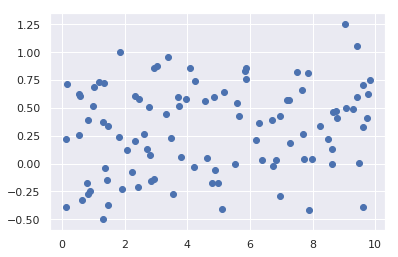

In [51]:
plt.scatter(x, y)
